In [10]:
from datasets import load_dataset, concatenate_datasets

ds = load_dataset("stanfordnlp/imdb")

In [11]:
ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [13]:
combined_dataset = concatenate_datasets([ds['train'], ds['test']])
combined_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 50000
})

In [14]:
df = combined_dataset.to_pandas()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


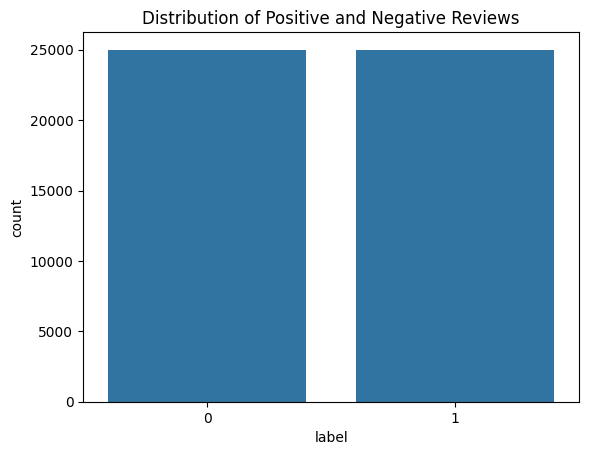

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sentiments
sns.countplot(x='label', data=df)
plt.title("Distribution of Positive and Negative Reviews")
plt.show()


<Axes: >

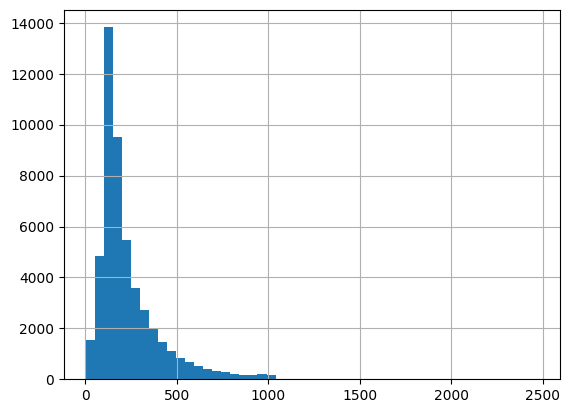

In [17]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=50)

In [24]:
max_length = df['review_length'].max()
avg_length = df['review_length'].mean()

print(f"The maximum review length is: {max_length} words")
print(f"The average review length is: {avg_length} words")

The maximum review length is: 2470 words
The average review length is: 231.15694 words


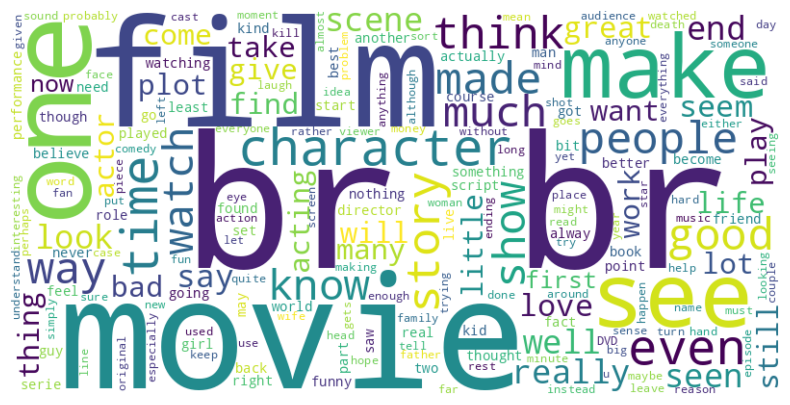

In [21]:
from wordcloud import WordCloud

text = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


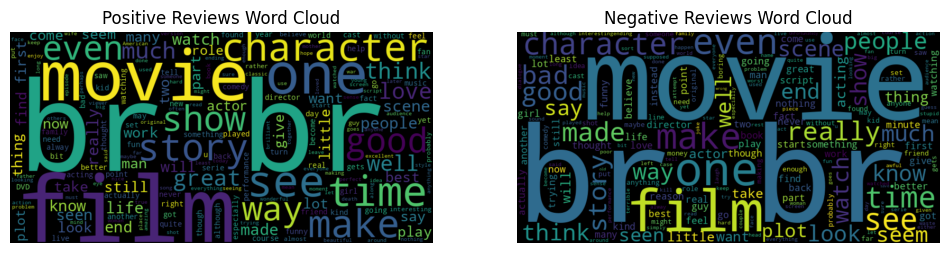

In [22]:
positive_reviews = df[df['label'] == 1]['text']
negative_reviews = df[df['label'] == 0]['text']

positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()
